<a href="https://colab.research.google.com/github/Yulinda03/Logistic-Regression/blob/main/Pediksi_Harga_Emas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Modul dan Load data**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dan praproses data
df = pd.read_csv('/content/drive/MyDrive/Semester 5/Deep Learning Dasar/DataSet/Salinan emas_meijuni25.csv')

# Drop kolom yang tidak diperlukan and rename columns for easier access
df.drop(columns=['Vol.', 'Perubahan%'], inplace=True, errors='ignore')
df.rename(columns={'Terakhir': 'Terakhir', 'Pembukaan': 'Pembukaan', 'Tertinggi': 'Tertinggi', 'Terendah': 'Terendah'}, inplace=True)

# Convert relevant columns to numeric, replacing '.' as thousand separator and ',' as decimal separator
cols_to_convert = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']
for col in cols_to_convert:
    df[col] = df[col].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)


# Ambil input dan label
X = df[['Pembukaan', 'Tertinggi', 'Terendah']].values
y = df['Terakhir'].values.reshape(-1, 1)

# Normalisasi input dan output
X_min, X_max = X.min(axis=0), X.max(axis=0)
y_min, y_max = y.min(), y.max()

X_norm = (X - X_min) / (X_max - X_min)
y_norm = (y - y_min) / (y_max - y_min)

# ** Neural Network Manual (1 Hidden Layer)**

In [5]:
# Fungsi aktivasi sigmoid dan turunannya
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# Inisialisasi parameter
np.random.seed(42)
input_size = 3
hidden_size = 4
output_size = 1
lr = 0.1
epoch = 10000

# Bobot dan bias
W1 = np.random.rand(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.rand(hidden_size, output_size)
b2 = np.zeros((1, output_size))


# **Training**

In [6]:
losses = []

for e in range(1, epoch+1):
    # Forward
    z1 = np.dot(X_norm, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)

    # Loss (MSE)
    loss = np.mean((y_norm - output)**2)
    losses.append(loss)

    # Backward
    d_output = (y_norm - output) * sigmoid_deriv(output)
    d_hidden = d_output.dot(W2.T) * sigmoid_deriv(a1)

    # Update weights
    W2 += a1.T.dot(d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr
    W1 += X_norm.T.dot(d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    # Print loss tiap 2000 epoch
    if e % 2000 == 0:
        print(f"Epoch {e} - Loss: {loss:.4f}")


Epoch 2000 - Loss: 0.0073
Epoch 4000 - Loss: 0.0052
Epoch 6000 - Loss: 0.0051
Epoch 8000 - Loss: 0.0050
Epoch 10000 - Loss: 0.0050


# **Prediksi dan Denormalisasi**

In [7]:
# Prediksi akhir
z1 = np.dot(X_norm, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
y_pred_norm = sigmoid(z2)

# Denormalisasi hasil
y_pred = y_pred_norm * (y_max - y_min) + y_min


# **Visualisasi: Harga Emas Aktual vs Prediksi**

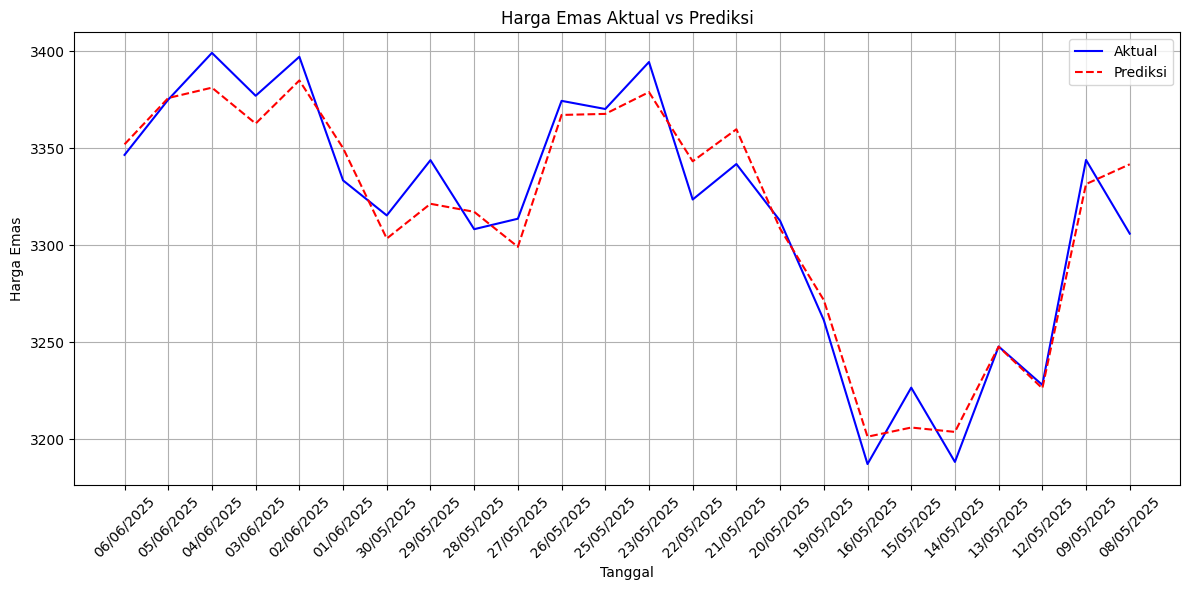

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Tanggal'], y, label='Aktual', color='blue')
plt.plot(df['Tanggal'], y_pred, label='Prediksi', color='red', linestyle='--')
plt.xticks(rotation=45)
plt.title('Harga Emas Aktual vs Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Menampilkan data dalam bentuk tabel
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah
0,06/06/2025,3346.60,3377.40,3398.30,3328.80
1,05/06/2025,3375.10,3398.00,3427.70,3362.30
2,04/06/2025,3399.20,3377.80,3409.70,3366.90
3,03/06/2025,3377.10,3406.50,3417.80,3357.20
4,02/06/2025,3397.20,3323.00,3408.10,3319.40
5,01/06/2025,3333.45,3322.55,3339.75,3319.50
6,30/05/2025,3315.40,3343.20,3347.00,3294.80
7,29/05/2025,3343.90,3311.80,3356.30,3269.10
8,28/05/2025,3308.30,3317.30,3337.50,3287.90
9,27/05/2025,3313.70,3369.60,3369.60,3297.90


In [13]:
# Combine the original dataframe with the normalized and predicted columns for display
df_display = df.copy()
df_display['Pembukaan (Normalized)'] = X_norm[:, 0]
df_display['Tertinggi (Normalized)'] = X_norm[:, 1]
df_display['Terendah (Normalized)'] = X_norm[:, 2]
df_display['Terakhir (Normalized)'] = y_norm[:, 0] # Use y_norm for actual normalized value
df_display['Terakhir (Predicted Normalized)'] = y_pred_norm[:, 0]
df_display['Terakhir (Predicted Denormalized)'] = y_pred[:, 0]


# Select relevant columns for the final display table
df_display = df_display[['Tanggal', 'Pembukaan', 'Tertinggi', 'Terendah', 'Terakhir',
                         'Pembukaan (Normalized)', 'Tertinggi (Normalized)', 'Terendah (Normalized)',
                         'Terakhir (Normalized)', 'Terakhir (Predicted Normalized)', 'Terakhir (Predicted Denormalized)']]

# Display the table
df_display

,Tanggal,Pembukaan,Tertinggi,Terendah,Terakhir,Pembukaan (Normalized),Tertinggi (Normalized),Terendah (Normalized),Terakhir (Normalized),Terakhir (Predicted Normalized),Terakhir (Predicted Denormalized)
0,06/06/2025,3377.40,3398.30,3328.80,3346.60,0.871068,0.839695,0.840010,0.751887,0.777700,3352.072319
1,05/06/2025,3398.00,3427.70,3362.30,3375.10,0.962339,1.000000,0.976946,0.886321,0.890280,3375.939278
2,04/06/2025,3377.80,3409.70,3366.90,3399.20,0.872840,0.901854,0.995749,1.000000,0.915458,3381.276996
3,03/06/2025,3406.50,3417.80,3357.20,3377.10,1.000000,0.946020,0.956099,0.895755,0.828144,3362.766568
4,02/06/2025,3323.00,3408.10,3319.40,3397.20,0.630040,0.893130,0.801586,0.990566,0.933012,3384.998483
5,01/06/2025,3322.55,3339.75,3319.50,3333.45,0.628046,0.520447,0.801995,0.689858,0.768489,3350.119566
6,30/05/2025,3343.20,3347.00,3294.80,3315.40,0.719539,0.559978,0.701030,0.604717,0.548398,3303.460464
7,29/05/2025,3311.80,3356.30,3269.10,3343.90,0.580416,0.610687,0.595978,0.739151,0.632992,3321.394261
8,28/05/2025,3317.30,3337.50,3287.90,3308.30,0.604785,0.508179,0.672825,0.571226,0.613454,3317.252273
9,27/05/2025,3369.60,3369.60,3297.90,3313.70,0.836509,0.683206,0.713702,0.596698,0.528321,3299.204135


# **Preprocessing**

In [15]:
import pandas as pd
# Menampilkan hasil preprocessing (data yang dinormalisasi)
# Buat DataFrame baru untuk menampilkan hasil normalisasi
df_normalized_display = pd.DataFrame(X_norm, columns=['Pembukaan (Normalized)', 'Tertinggi (Normalized)', 'Terendah (Normalized)'])
df_normalized_display['Terakhir (Normalized)'] = y_norm

# Tampilkan 11 baris pertama dari DataFrame yang menampilkan hasil normalisasi
print("Hasil Preprocessing (Data yang Dinormalisasi):")
print(df_normalized_display.head(11).to_markdown(index=False))

Hasil Preprocessing (Data yang Dinormalisasi):
|   Pembukaan (Normalized) |   Tertinggi (Normalized) |   Terendah (Normalized) |   Terakhir (Normalized) |
|-------------------------:|-------------------------:|------------------------:|------------------------:|
|                 0.871068 |                 0.839695 |                0.84001  |                0.751887 |
|                 0.962339 |                 1        |                0.976946 |                0.886321 |
|                 0.87284  |                 0.901854 |                0.995749 |                1        |
|                 1        |                 0.94602  |                0.956099 |                0.895755 |
|                 0.63004  |                 0.89313  |                0.801586 |                0.990566 |
|                 0.628046 |                 0.520447 |                0.801995 |                0.689858 |
|                 0.719539 |                 0.559978 |                0.70103  |        

# **grafik Loss**

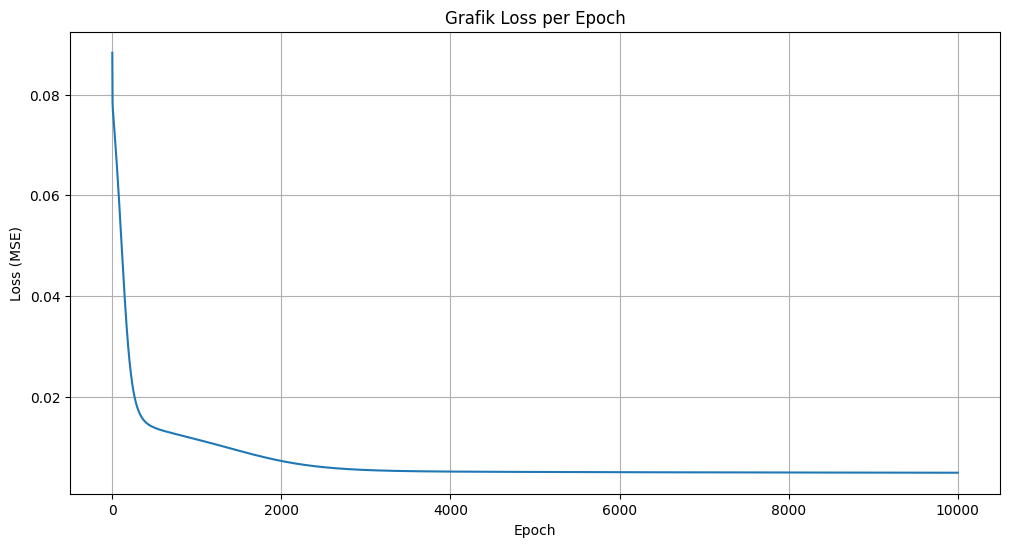

In [18]:
import matplotlib.pyplot as plt
import numpy as np
# Visualisasi grafik loss per 2000 epoch
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, epoch + 1), losses)
plt.title('Grafik Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

# **Grafik aktual vs Prediksi**

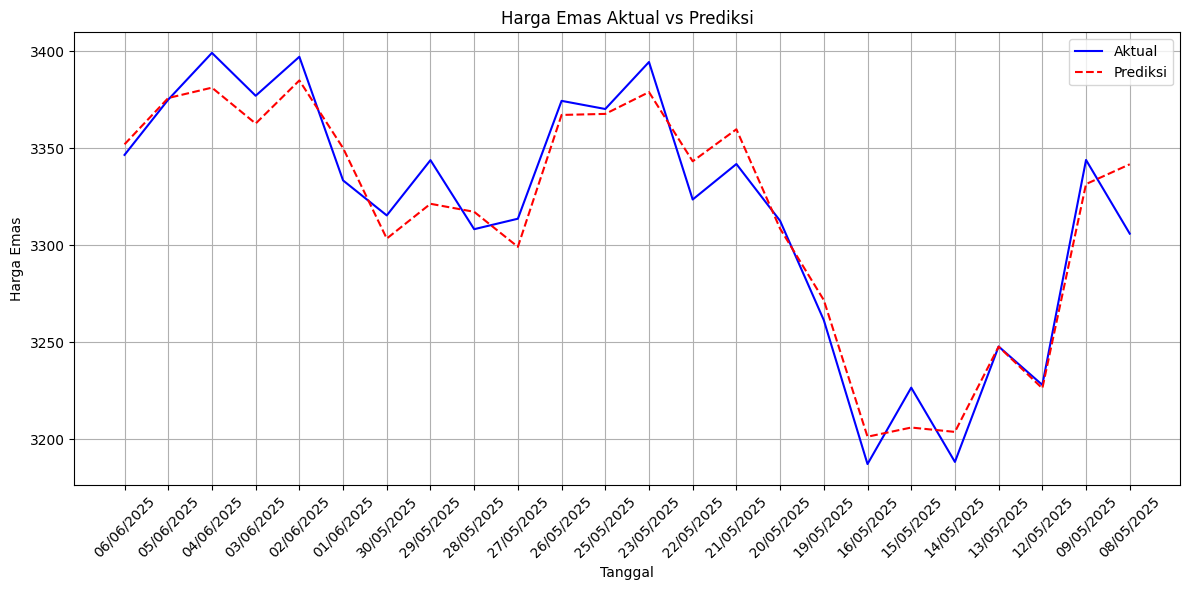

In [19]:
import matplotlib.pyplot as plt
# # **Visualisasi: Harga Emas Aktual vs Prediksi**
plt.figure(figsize=(12,6))
plt.plot(df['Tanggal'], y, label='Aktual', color='blue')
plt.plot(df['Tanggal'], y_pred, label='Prediksi', color='red', linestyle='--')
plt.xticks(rotation=45)
plt.title('Harga Emas Aktual vs Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
